---


# **CLUSTERING**


This assignment aims to deepen your understanding of clustering algorithms and introduce the concept of dimensionality reduction using Principal Component Analysis (PCA). You will use K-Means and Agglomerative Clustering and explore the impact of PCA on these clustering techniques.

---
**Dataset Path:** "Data/wholesale_customers_data.csv"
---

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

***Variables***

* FRESH: annual spending (m.u.) on fresh products (Continuous);
* MILK: annual spending (m.u.) on milk products (Continuous);
* GROCERY: annual spending (m.u.)on grocery products (Continuous);
* FROZEN: annual spending (m.u.)on frozen products (Continuous)
* DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
* DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
* CHANNEL: customers Channel - (Hotel/Restaurant/Cafe) (Nominal)
* REGION: customers Region  (Lisnon, Oporto or Other) (Nominal)




# **Necessary Imports**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score

# **PART- 1: Data Preprocessing and Visualization (20 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Analyze  the dataset and explain analysis results
* Check and handle missing values and outliers
* Transform raw data into a format suitable for ML algorithms: PCA, and clustering, such as normalization.



In [2]:
#initialize the data frame
df = pd.read_csv('Data/wholesale_customers_data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


The dataset consists of 440 samples. There are a total of 8 columns: Channel and Region (numeric, int64), and Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen (numeric columns, float64).
The range in the columns Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen is quite large. Most of the data is concentrated between the 1st and 3rd quartiles. The mean of Channel is 1.32, indicating that the most common values are 1 and 2, while the mean of Region is 2.54, suggesting that regions 2 and 3 are more prevalent.

In [5]:
#Check for missing values for each column
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
#Check for missing values
print(df.isnull().sum().sum())

0


There is no missing values.

In [7]:
# Select the numeric variables
numeric_columns = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Calculate the 1st and 3rd quartiles to find the IQR
Q1 = numeric_columns.apply(lambda x: x.quantile(0.25))
Q3 = numeric_columns.apply(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR; # Lower bound: Values more than 1.5 IQR below Q1
upper_bound = Q3 + 1.5 * IQR; # Upper bound: Values more than 1.5 IQR above Q3

#Values that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.
numeric_outliers = ((numeric_columns < lower_bound) | (numeric_columns > upper_bound))

print(numeric_outliers.sum()) 

Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64


In the dataset according to IQR method, **Fresh** column has 20 outliers, **Milk** column has 28 outliers, **Grocery** column has 24 outliers, **Frozen** column has 43 outliers, **Detergents_Paper** column has 30 outliers, and **Delicassen** column has 27 outliers.

In [8]:
# The outliers in the Fresh column were replaced with the median value.
medianFresh = df['Fresh'].median()
df['Fresh'] = df['Fresh'].where(~numeric_outliers['Fresh'], medianFresh)

# The outliers in the Milk column were replaced with the median value.
medianMilk = df['Milk'].median()
df['Milk'] = df['Milk'].where(~numeric_outliers['Milk'], medianMilk)

# The outliers in the Grocery column were replaced with the median value.
medianGrocery = df['Grocery'].median()
df['Grocery'] = df['Grocery'].where(~numeric_outliers['Grocery'], medianGrocery)

# The outliers in the Frozen column were replaced with the median value.
medianFrozen = df['Frozen'].median()
df['Frozen'] = df['Frozen'].where(~numeric_outliers['Frozen'], medianFrozen)

# The outliers in the Detergents_Paper column were replaced with the median value.
medianDetergents_Paper = df['Detergents_Paper'].median()
df['Detergents_Paper'] = df['Detergents_Paper'].where(~numeric_outliers['Detergents_Paper'], medianDetergents_Paper)

# The outliers in the Delicassen column were replaced with the median value.
medianDelicassen = df['Delicassen'].median()
df['Delicassen'] = df['Delicassen'].where(~numeric_outliers['Delicassen'], medianDelicassen)

df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561.0,214,2674.0,1338.0
1,2,3,7057,9810,9568.0,1762,3293.0,1776.0
2,2,3,6353,8808,7684.0,2405,3516.0,965.5
3,1,3,13265,1196,4221.0,6404,507.0,1788.0
4,2,3,22615,5410,7198.0,3915,1777.0,965.5
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027.0,1526,182.0,2204.0
436,1,3,8504,1431,764.0,4510,93.0,2346.0
437,2,3,14531,15488,4755.5,437,816.5,1867.0
438,1,3,10290,1981,2232.0,1038,168.0,2125.0


In [9]:
original_df = df.copy()
scaler = StandardScaler()

# Specify the numeric columns to be normalized
numeric_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Apply Z-Score normalization to the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.312278,1.581331,0.251637,-1.005765,0.384841,0.302219
1,2,3,-0.352577,1.626645,0.627928,-0.080488,0.659291,0.823978
2,2,3,-0.435980,1.331810,0.274698,0.303849,0.758164,-0.141514
3,1,3,0.382886,-0.907994,-0.374579,2.694150,-0.575956,0.838273
4,2,3,1.490583,0.331960,0.183578,1.206413,-0.012868,-0.141514
...,...,...,...,...,...,...,...,...
435,1,3,2.330300,2.286051,1.838923,-0.221551,-0.720054,1.333825
436,1,3,-0.181150,-0.838847,-1.022730,1.562059,-0.759514,1.502979
437,2,3,0.532870,3.297376,-0.274365,-0.872473,-0.438731,0.932380
438,1,3,0.030437,-0.677011,-0.747495,-0.513240,-0.726261,1.239717


PCA, K-Means, distance-based algorithms, etc., can use Z-score normalization. The data was normalized using the Z-score normalization technique to make it suitable for ML algorithms.

## 1.2. Data Visualization (10 Pts)

* Visualize the distribution of features
* Plot a correlation heatmap to analyze their relationships.
* Comment on any findings

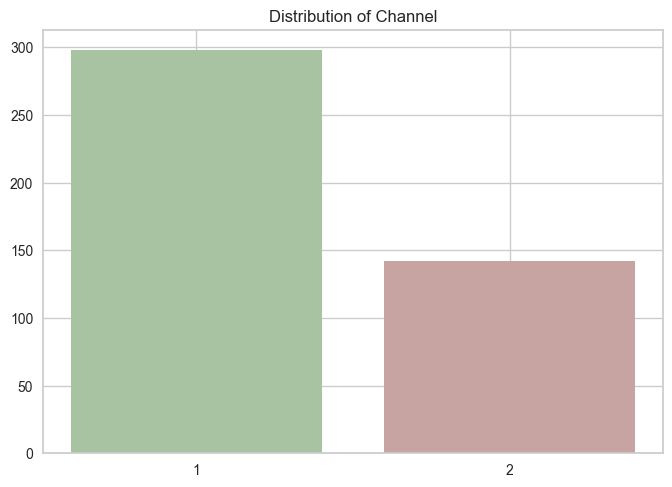

In [10]:
# Count the number of each unique value in the "Channel" column
channel_counts = df["Channel"].value_counts()

#Bar plot to visualize the Distribution of Channel
plt.bar(channel_counts.index, channel_counts.values, color=['#A7C3A1', '#C7A3A1'])
plt.xticks(ticks=channel_counts.index, labels=channel_counts.index)

# Add a title to the plot
plt.title("Distribution of Channel")

# Display the plot
plt.show()

The dataset contains **250-300 samples of Channel 1 (Hotel)**, **100-150 samples of Channel 2 (Restaurant)**, and **0 samples of Channel 3 (Cafe)**.

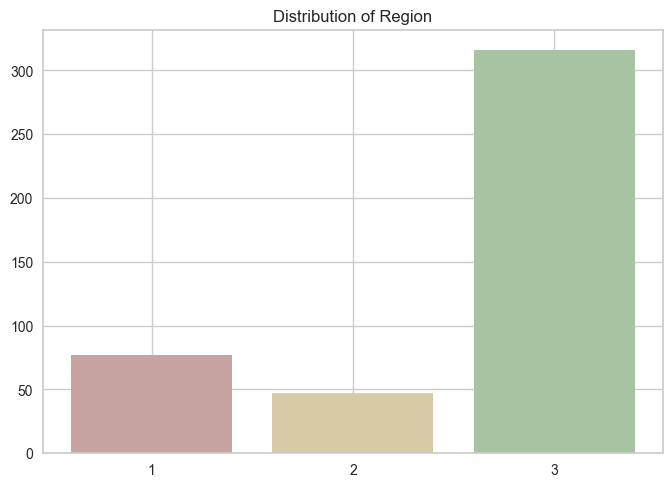

In [11]:
# Count the number of each unique value in the "Region" column
region_counts = df["Region"].value_counts()

#Bar plot to visualize the Distribution of Region
plt.bar(region_counts.index, region_counts.values, color=['#A7C3A1', '#C7A3A1', '#D8C9A7'])
plt.xticks(ticks=region_counts.index, labels=region_counts.index)

# Add a title to the plot
plt.title("Distribution of Region")

# Display the plot
plt.show()

When examining the plot:

- **Region 3 (Other)** has significantly more samples compared to the other regions, with **300+ samples**.  
- **Region 1 (Lisbon)** contains **50-100 samples**, making it the second largest group.  
- **Region 2 (Oporto)** has approximately **50 samples**, being the smallest group.

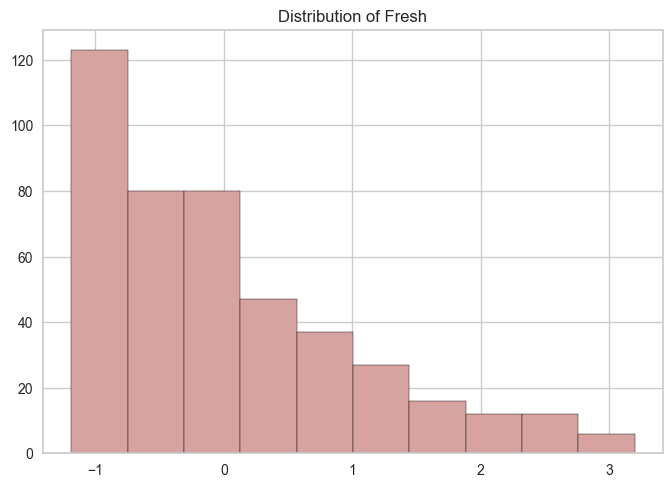

In [12]:
# Since Fresh is a numerical variable, it was visualized using a histogram.
plt.hist(df['Fresh'], color='#D7A3A1', edgecolor='black') 
plt.title('Distribution of Fresh')
# Display the plot
plt.show()

When the plot is examined, it is observed that the Fresh column is left-skewed. Most of the data is concentrated around lower values, and the frequency of samples with higher values is low.

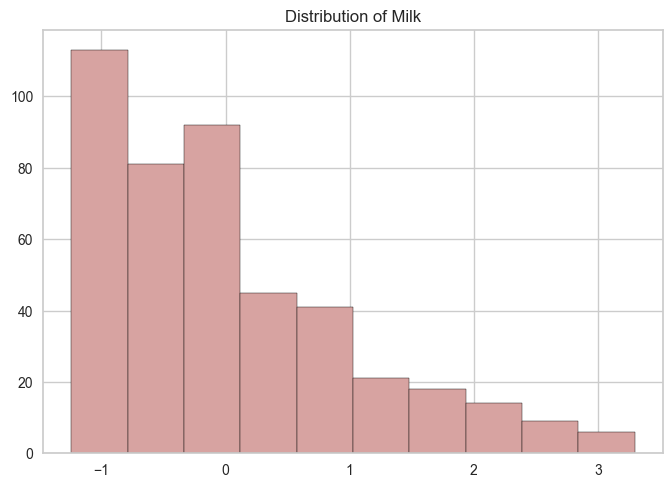

In [13]:
# Since Milk is a numerical variable, it was visualized using a histogram.
plt.hist(df['Milk'], color='#D7A3A1', edgecolor='black') 
plt.title('Distribution of Milk')
# Display the plot
plt.show()

When the plot is examined, it is observed that the Milk column is left-skewed. Most of the data is concentrated around lower values, and the frequency of samples with higher values is low.

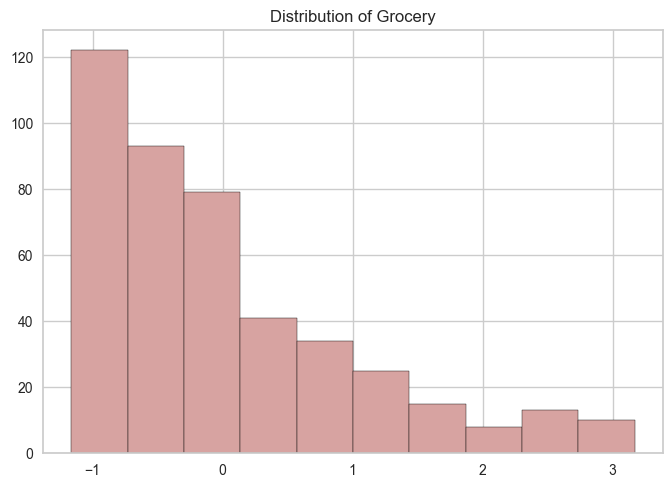

In [14]:
# Since Grocery is a numerical variable, it was visualized using a histogram.
plt.hist(df['Grocery'], color='#D7A3A1', edgecolor='black') 
plt.title('Distribution of Grocery')
# Display the plot
plt.show()

When the plot is examined, it is observed that the Grocery column is left-skewed, with the frequency of data rapidly decreasing after 0 and continuing to decline.

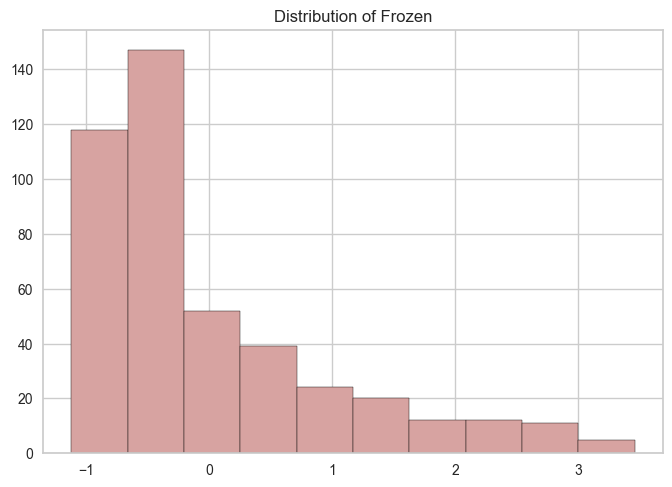

In [15]:
# Since Frozen is a numerical variable, it was visualized using a histogram.
plt.hist(df['Frozen'], color='#D7A3A1', edgecolor='black') 
plt.title('Distribution of Frozen')
# Display the plot
plt.show()

When the plot is examined, it is observed that the Frozen column picks most frequently in the range of -1 to 0, followed by a sudden drop and a continuous decrease in the values.

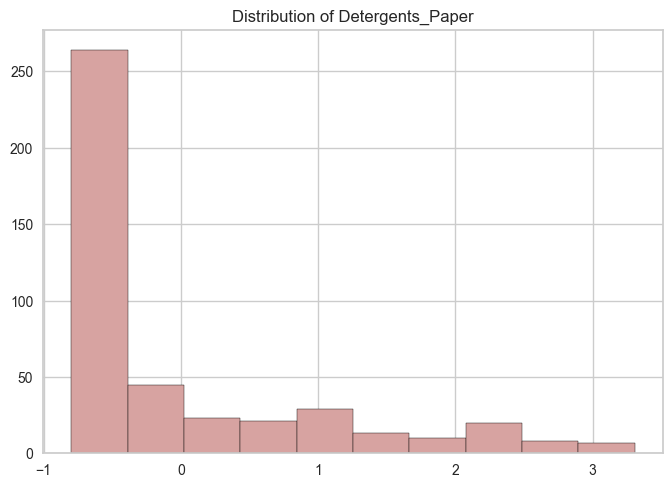

In [16]:
# Since Detergents_Paper is a numerical variable, it was visualized using a histogram.
plt.hist(df['Detergents_Paper'], color='#D7A3A1', edgecolor='black') 
plt.title('Distribution of Detergents_Paper')
# Display the plot
plt.show()

When the plot is examined, it is observed that most of the data in the Detergents_Paper column is concentrated at the smallest value, and there is a sudden drop in the frequency count, with the frequency decreasing as the values increase.

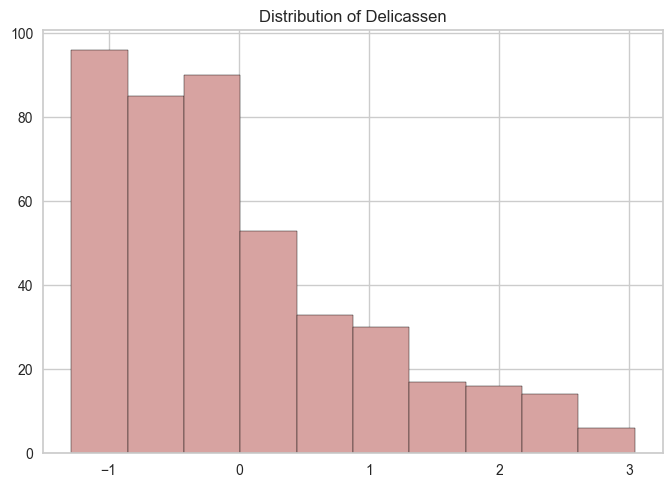

In [17]:
# Since Delicassen is a numerical variable, it was visualized using a histogram.
plt.hist(df['Delicassen'], color='#D7A3A1', edgecolor='black') 
plt.title('Distribution of Delicassen')
# Display the plot
plt.show()

When the plot is examined, it is observed that the Delicassen column is concentrated at lower values, and the frequencies decrease progressively for values greater than 0.

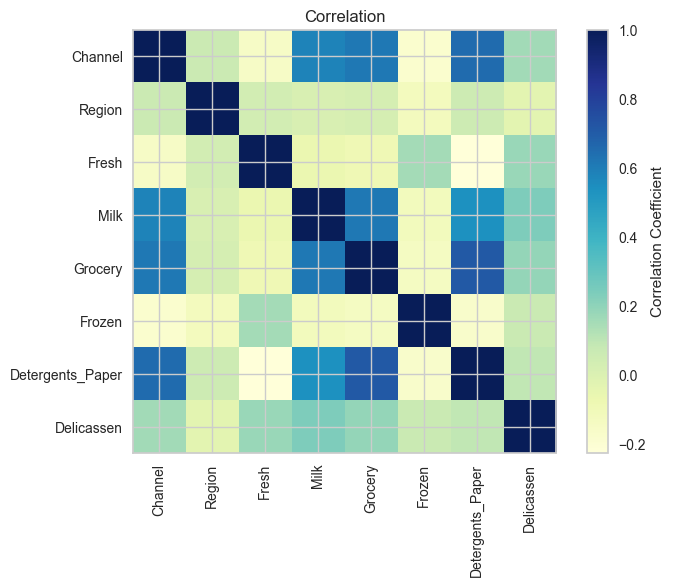

In [18]:
correlation_matrix = df.corr()

# create heatmap
plt.imshow(correlation_matrix, cmap='YlGnBu')
plt.colorbar(label="Correlation Coefficient")

plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title('Correlation')
plt.show()

When examining the correlation matrix, **Channel**, **Detergents_Paper**, **Grocery**, and **Milk** all show a positive correlation with each other. The correlation matrix is symmetric, and all values along the diagonal are 1, because a variable is perfectly positively correlated with itself. The correlation of the **Region** variable with other variables is generally low or weak.

# **PART- 2: Clustering on the Original Dataset (30 points)**



## 2.1 K-Means Clustering on the Original Dataset (15 points)

* Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.


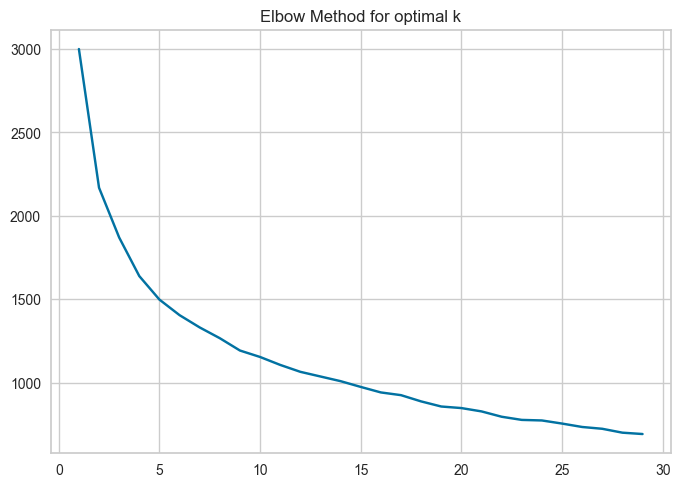

In [19]:
kmeans_df = df.copy()
# Initialize an empty list to store the SSD
ssd=[]

# Range of k to test
K = range(1, 30)

#For each possible k values, calculate the SSD using KMeans and append the SSD to the list 
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(kmeans_df)
    ssd.append(kmeans.inertia_)

#Plot the Elbow Method graph
plt.plot(K, ssd)
plt.title('Elbow Method for optimal k')
plt.show()

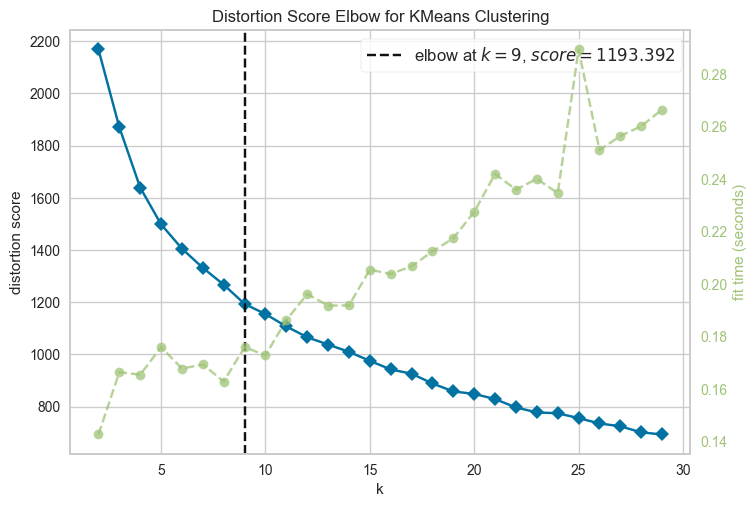

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Initializing KMeans
kmeans = KMeans(random_state=42, n_init=10)

# Creating the ElbowVisualizer instance to determine the optimal number of clusters (k)
elbow = KElbowVisualizer(kmeans,random_state=42, k =(2,30))

# Fitting the ElbowVisualizer to the kmeans_df
elbow.fit(kmeans_df)

# Displaying the elbow plot
elbow.show()

 According to the Elbow Method graph, optimal k can be selected as 9.

In [21]:
# Apply KMeans clustering with 9 clusters on the original data (no PCA)
kmeans_without_pca = KMeans(n_clusters=9, random_state = 42, n_init=10).fit(kmeans_df)

# Add the cluster labels to the dataframe for each data point
kmeans_df['Cluster'] = kmeans_without_pca.labels_
kmeans_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,0.312278,1.581331,0.251637,-1.005765,0.384841,0.302219,1
1,2,3,-0.352577,1.626645,0.627928,-0.080488,0.659291,0.823978,5
2,2,3,-0.435980,1.331810,0.274698,0.303849,0.758164,-0.141514,1
3,1,3,0.382886,-0.907994,-0.374579,2.694150,-0.575956,0.838273,6
4,2,3,1.490583,0.331960,0.183578,1.206413,-0.012868,-0.141514,4
...,...,...,...,...,...,...,...,...,...
435,1,3,2.330300,2.286051,1.838923,-0.221551,-0.720054,1.333825,4
436,1,3,-0.181150,-0.838847,-1.022730,1.562059,-0.759514,1.502979,6
437,2,3,0.532870,3.297376,-0.274365,-0.872473,-0.438731,0.932380,5
438,1,3,0.030437,-0.677011,-0.747495,-0.513240,-0.726261,1.239717,7


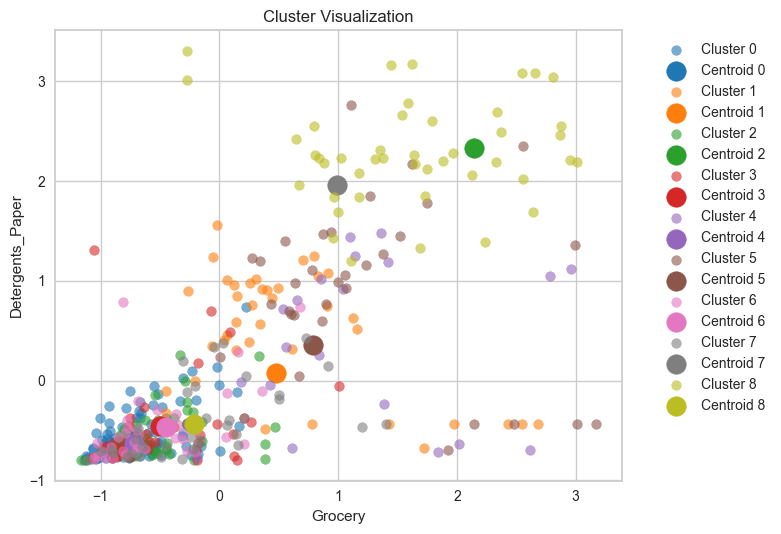

In [31]:
# 9 different colors are used
colors = plt.cm.tab10(range(9))

# Visualize each of the 9 clusters
for cluster in range(9):  
    cluster_data = kmeans_df[kmeans_df['Cluster'] == cluster]
    # Plot the data
    plt.scatter(cluster_data.iloc[:, 4], cluster_data.iloc[:, 6], color=[colors[cluster]], label=f'Cluster {cluster}', alpha=0.6)
    
    # Get the cluster centroids from the K-Means model
    centroids = kmeans.cluster_centers_
    # Plot the centroids
    plt.scatter(centroids[cluster, 4], centroids[cluster, 6], color=colors[cluster], s=200, label=f'Centroid {cluster}')

plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('Cluster Visualization')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 2.2. Hierarchical Agglomerative Clustering (HAC) on the Original Dataset (15 points)

* Apply HAC on the dataset, visualize the dendogram. Then, comment on whether the dendogram agrees with the clusters obtained by K-Means. Try with 2 different linkage methods.

In [37]:
hac_df = df.copy()

# Apply Agglomerative Clustering with 9 clusters and 'average' linkage method
average_agg_cluster = AgglomerativeClustering(n_clusters = 9, linkage='average')

# Fit the model and predict the clusters
average_agg_cluster = average_agg_cluster.fit_predict(hac_df)

# Add the predicted cluster labels as a new column in the hac_df
hac_df['HAC_Average'] = average_agg_cluster 
hac_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,HAC_Average
0,2,3,0.312278,1.581331,0.251637,-1.005765,0.384841,0.302219,6
1,2,3,-0.352577,1.626645,0.627928,-0.080488,0.659291,0.823978,6
2,2,3,-0.435980,1.331810,0.274698,0.303849,0.758164,-0.141514,6
3,1,3,0.382886,-0.907994,-0.374579,2.694150,-0.575956,0.838273,3
4,2,3,1.490583,0.331960,0.183578,1.206413,-0.012868,-0.141514,2
...,...,...,...,...,...,...,...,...,...
435,1,3,2.330300,2.286051,1.838923,-0.221551,-0.720054,1.333825,2
436,1,3,-0.181150,-0.838847,-1.022730,1.562059,-0.759514,1.502979,3
437,2,3,0.532870,3.297376,-0.274365,-0.872473,-0.438731,0.932380,1
438,1,3,0.030437,-0.677011,-0.747495,-0.513240,-0.726261,1.239717,4


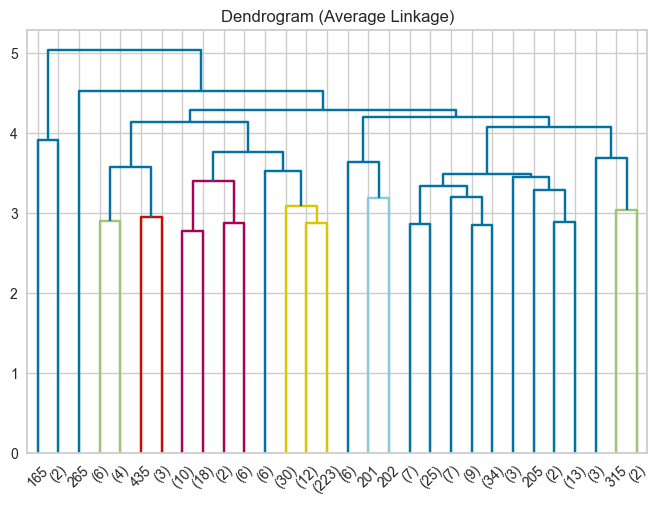

In [38]:
hac_data = hac_df.iloc[:, :-1]
# Hierarchical Clustering using the 'average' linkage method
hc_average = linkage(hac_data, 'average')

# Create the dendrogram for the average linkage
plt.title('Dendrogram (Average Linkage)')
dendro = dendrogram(hc_average, truncate_mode='lastp', leaf_font_size=10)
plt.show()

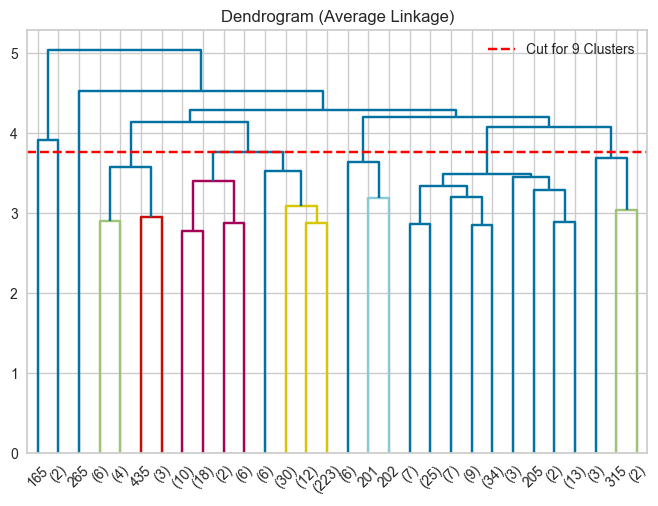

In [39]:
# Create the dendrogram for the average linkage
plt.title('Dendrogram (Average Linkage)')
dendro = dendrogram(hc_average, truncate_mode='lastp', leaf_font_size=10)

# Mark the clusters (cut at 9 clusters)
num_clusters = 9 
cut_distance = hc_average[-(num_clusters - 1), 2] 
plt.axhline(y=cut_distance, color='red', linestyle='--', label=f'Cut for {num_clusters} Clusters')

plt.legend()
plt.show()

In [40]:
# Apply Agglomerative Clustering with 9 clusters and 'complete' linkage method
complete_agg_cluster = AgglomerativeClustering(n_clusters=9, linkage='complete')

# Fit the model and predict the clusters
complete_agg_cluster = complete_agg_cluster.fit_predict(hac_df)

# Add the predicted cluster labels as a new column in the hac_df
hac_df['HAC_Complete'] = complete_agg_cluster
hac_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,HAC_Average,HAC_Complete
0,2,3,0.312278,1.581331,0.251637,-1.005765,0.384841,0.302219,6,2
1,2,3,-0.352577,1.626645,0.627928,-0.080488,0.659291,0.823978,6,1
2,2,3,-0.435980,1.331810,0.274698,0.303849,0.758164,-0.141514,6,1
3,1,3,0.382886,-0.907994,-0.374579,2.694150,-0.575956,0.838273,3,3
4,2,3,1.490583,0.331960,0.183578,1.206413,-0.012868,-0.141514,2,7
...,...,...,...,...,...,...,...,...,...,...
435,1,3,2.330300,2.286051,1.838923,-0.221551,-0.720054,1.333825,2,7
436,1,3,-0.181150,-0.838847,-1.022730,1.562059,-0.759514,1.502979,3,3
437,2,3,0.532870,3.297376,-0.274365,-0.872473,-0.438731,0.932380,1,0
438,1,3,0.030437,-0.677011,-0.747495,-0.513240,-0.726261,1.239717,4,3


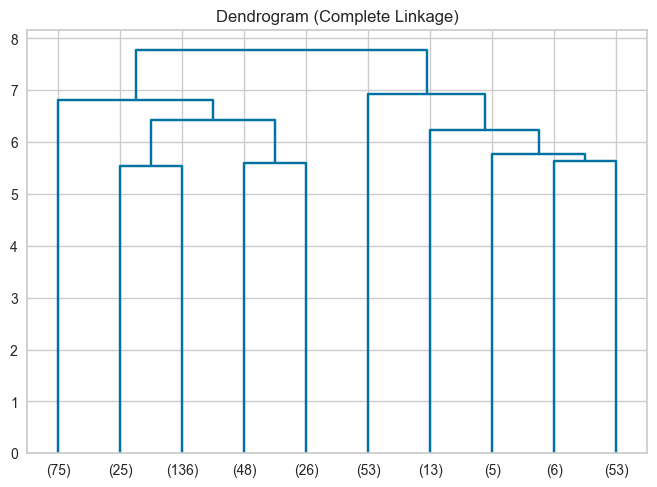

In [41]:
# Hierarchical Clustering using the 'complete' linkage method
hc_complete = linkage(hac_data, method='complete')

# Create the dendrogram for the complete linkage
plt.title('Dendrogram (Complete Linkage)')
dendrogram(hc_complete, truncate_mode='lastp', p=10, leaf_font_size=10)
plt.show()

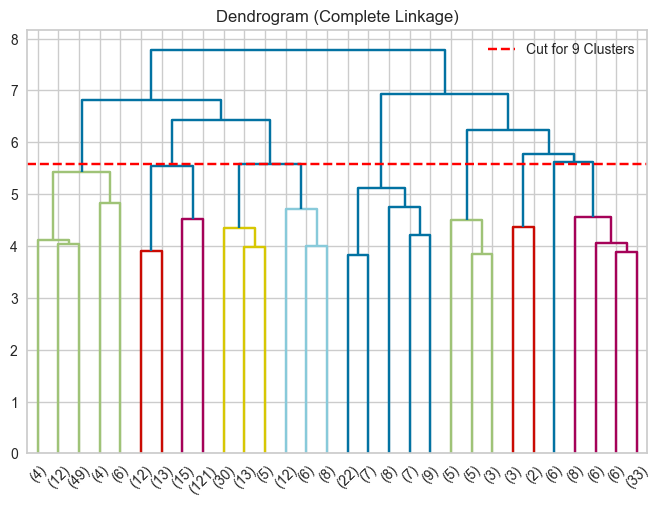

In [42]:
# Create the dendrogram for the complete linkage
plt.title('Dendrogram (Complete Linkage)')
dendro = dendrogram(hc_complete, truncate_mode='lastp', leaf_font_size=10)

# Mark the clusters (cut at 9 clusters)
num_clusters = 9 
cut_distance = hc_complete[-(num_clusters - 1), 2] 
plt.axhline(y=cut_distance, color='red', linestyle='--', label=f'Cut for {num_clusters} Clusters')

plt.legend()
plt.show()

In [43]:
df['KMeans'] = kmeans_df['Cluster']
df['HAC_Average'] = hac_df['HAC_Average']
df['HAC_Complete'] = hac_df['HAC_Complete']
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans,HAC_Average,HAC_Complete
0,2,3,0.312278,1.581331,0.251637,-1.005765,0.384841,0.302219,1,6,2
1,2,3,-0.352577,1.626645,0.627928,-0.080488,0.659291,0.823978,5,6,1
2,2,3,-0.435980,1.331810,0.274698,0.303849,0.758164,-0.141514,1,6,1
3,1,3,0.382886,-0.907994,-0.374579,2.694150,-0.575956,0.838273,6,3,3
4,2,3,1.490583,0.331960,0.183578,1.206413,-0.012868,-0.141514,4,2,7
...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,2.330300,2.286051,1.838923,-0.221551,-0.720054,1.333825,4,2,7
436,1,3,-0.181150,-0.838847,-1.022730,1.562059,-0.759514,1.502979,6,3,3
437,2,3,0.532870,3.297376,-0.274365,-0.872473,-0.438731,0.932380,5,1,0
438,1,3,0.030437,-0.677011,-0.747495,-0.513240,-0.726261,1.239717,7,4,3


In [52]:
# Create a crosstab to compare the K-Means clusters with the HAC clusters
comparison_average = pd.crosstab(df['KMeans'], df['HAC_Average'])

# Display the crosstab for analysis
print(comparison_average)

HAC_Average  0  1  2   3    4  5   6  7  8
KMeans                                    
0            0  0  0   0  114  0   0  0  0
1            2  2  0   0   28  0  14  0  0
2            0  0  5   0   49  0   0  0  0
3            0  0  0   1   44  0   3  0  0
4            0  4  6   0    1  0   9  0  2
5            4  2  0   0    2  0  26  1  0
6            0  0  1  31    6  0   1  0  0
7            0  0  2   4   27  1   4  0  0
8            0  0  0   0    0  0  44  0  0


Although HAC and KMeans algorithms generally create similar clusters, some differences have been observed. KMeans tends to form more distinct and rigid clusters, while HAC creates more flexible and broader clusters. However, both algorithms group much of the data in a similar way, producing comparable results. In summary, while HAC and KMeans adopt different approaches to clustering, they often yield similar clusters.

- **HAC Cluster 4 (114 Data Points)**: The 114 data points in KMeans Cluster 0 are largely found in HAC Cluster 4.
- **HAC Cluster 1 (2 Data Points)**: The 2 data points in KMeans Cluster 1 are found in HAC Cluster 1.
- **HAC Cluster 2 (49 Data Points)**: The 49 data points in KMeans Cluster 2 are mostly found in HAC Cluster 2.
- **HAC Cluster 3 (44 Data Points)**: The 44 data points in KMeans Cluster 3 are found in HAC Cluster 3.
- **HAC Cluster 0 (6 Data Points)**: The 6 data points in KMeans Cluster 4 are found in HAC Cluster 0.
- **HAC Cluster 5 (26 Data Points)**: The 26 data points in KMeans Cluster 5 are found in HAC Cluster 5.
- **HAC Cluster 6 (44 Data Points)**: The 44 data points in KMeans Cluster 6 are found in HAC Cluster 6.
- **HAC Cluster 7 (27 Data Points)**: The 27 data points in KMeans Cluster 7 are found in HAC Cluster 7.
- **HAC Cluster 8 (44 Data Points)**: The 44 data points in KMeans Cluster 8 are found in HAC Cluster 8.

In [53]:
# Create a crosstab to compare the K-Means clusters with the HAC clusters
comparison_complete  = pd.crosstab(df['KMeans'], df['HAC_Complete'])

# Display the crosstab for analysis
print(comparison_complete)

HAC_Complete  0   1   2   3   4   5  6  7   8
KMeans                                       
0             0   0   0   2  15  97  0  0   0
1             4   7   3   0   0  32  0  0   0
2             0   0   0   1  46   2  0  5   0
3             0   0   0   0   7  40  0  0   1
4             4   0   9   1   0   0  2  6   0
5             6  12  14   0   0   3  0  0   0
6             0   1   0   9   5   1  0  1  22
7             0   0   5  31   0   0  0  2   0
8             0  43   1   0   0   0  0  0   0


- **HAC Cluster 5 (97 Data Points)**: Most of the data points in KMeans Cluster 0 are found in HAC Cluster 5.
- **HAC Cluster 0 (4 Data Points) and HAC Cluster 1 (7 Data Points)**: The data points in KMeans Cluster 1 are distributed across HAC Cluster 0 and HAC Cluster 1.
- **HAC Cluster 4 (46 Data Points)**: Most of the data points in KMeans Cluster 2 are found in HAC Cluster 4.
- **HAC Cluster 5 (40 Data Points)**: Most of the data points in KMeans Cluster 3 are found in HAC Cluster 5.
- **HAC Cluster 2 (9 Data Points)**: The data points in KMeans Cluster 4 are mostly found in HAC Cluster 2.
- **HAC Cluster 1 (12 Data Points) and HAC Cluster 2 (14 Data Points)**: The data points in KMeans Cluster 5 are distributed across HAC Cluster 1 and HAC Cluster 2.
- **HAC Cluster 3 (9 Data Points) and HAC Cluster 8 (22 Data Points)**: The data points in KMeans Cluster 6 are distributed across HAC Cluster 3 and HAC Cluster 8.
- **HAC Cluster 3 (31 Data Points)**: Most of the data points in KMeans Cluster 7 are found in HAC Cluster 3.

# **PART- 3: Dimensionality Reduction (30 points)**

### *What is Dimensionality Reduction and Why is it Used?*

Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It is an attempt to reduce the complexity of the task as an attempt to remove the curse of dimensionality - also for visualization purposes.

### *Principal Component Analysis (PCA)*

PCA is a technique that transforms original correlated features into new uncorrelated features (principal components) based on variance. **Process:**

* **Linear Combinations of Features:** PCA begins by creating linear combinations of the existing features in the dataset.
* **First Principal Component:** The first principal component (PC1) is the linear combination that captures the highest variance in the dataset. Mathematically, this is the direction in which the data varies the most.
* **Subsequent Principal Components:** Each following principal component is the linear combination of features that captures the highest variance possible while being orthogonal (perpendicular) to all previously determined principal components. This ensures that each new principal component adds unique information.
* **Covariance Matrix and Eigenvectors:** The process of finding these principal components corresponds to computing the eigenvectors of the covariance matrix of the data. The covariance matrix encapsulates how each pair of variables in the dataset co-varies.
* **Eigenvalues:** The eigenvalues associated with each eigenvector (principal component) indicate the amount of variance that the principal component explains. Larger eigenvalues mean more variance explained.


***You can use scikit-learn***




## 3.1. Apply PCA (15 Pts)

* Normalize the data
* Apply PCA to the normalized data using scikit-learn
* Visualize the data with the first two principal components (PC) as the axes. Do you see any clusters?
* Components selection: Visualize the variance explained by each PC. Then choose the number of components that explain the data sufficiently enough.
* Comment on any findings

In [56]:
original_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561.0,214,2674.0,1338.0
1,2,3,7057,9810,9568.0,1762,3293.0,1776.0
2,2,3,6353,8808,7684.0,2405,3516.0,965.5
3,1,3,13265,1196,4221.0,6404,507.0,1788.0
4,2,3,22615,5410,7198.0,3915,1777.0,965.5
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027.0,1526,182.0,2204.0
436,1,3,8504,1431,764.0,4510,93.0,2346.0
437,2,3,14531,15488,4755.5,437,816.5,1867.0
438,1,3,10290,1981,2232.0,1038,168.0,2125.0


In [57]:
scaler = StandardScaler()
normalized_data = original_df.copy()

# Specify the numeric columns to be normalized
numeric_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Apply Z-Score normalization to the numeric columns
normalized_data[numeric_columns] = scaler.fit_transform(normalized_data[numeric_columns])
normalized_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.312278,1.581331,0.251637,-1.005765,0.384841,0.302219
1,2,3,-0.352577,1.626645,0.627928,-0.080488,0.659291,0.823978
2,2,3,-0.435980,1.331810,0.274698,0.303849,0.758164,-0.141514
3,1,3,0.382886,-0.907994,-0.374579,2.694150,-0.575956,0.838273
4,2,3,1.490583,0.331960,0.183578,1.206413,-0.012868,-0.141514
...,...,...,...,...,...,...,...,...
435,1,3,2.330300,2.286051,1.838923,-0.221551,-0.720054,1.333825
436,1,3,-0.181150,-0.838847,-1.022730,1.562059,-0.759514,1.502979
437,2,3,0.532870,3.297376,-0.274365,-0.872473,-0.438731,0.932380
438,1,3,0.030437,-0.677011,-0.747495,-0.513240,-0.726261,1.239717


In [58]:
# Create a PCA object to perform dimensionality reduction
pca = PCA()

# Fit and transform the normalized data using PCA
pca_fit = pca.fit_transform(normalized_data)

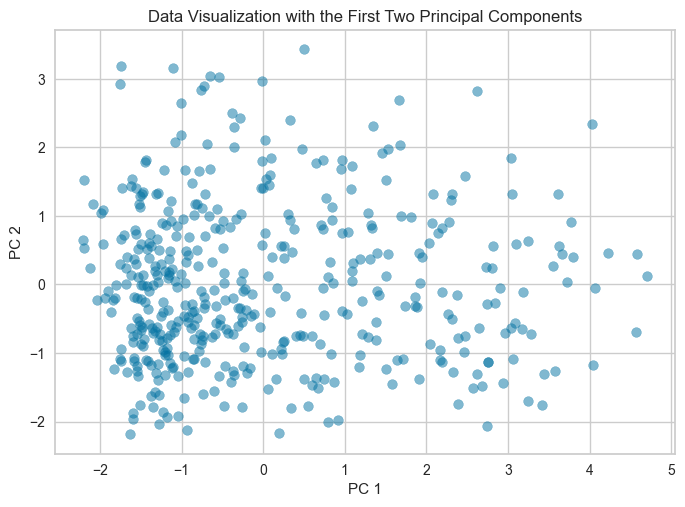

In [59]:
# First principal component (PC1)
pc1 = pca_fit[:, 0]

# Second principal component (PC2)
pc2 = pca_fit[:, 1]

# Visualize the data points using the first two principal components
plt.scatter(pc1, pc2, alpha=0.5)
plt.title('Data Visualization with the First Two Principal Components')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

The data is generally spread across a specific area, but no distinct clusters are visible.

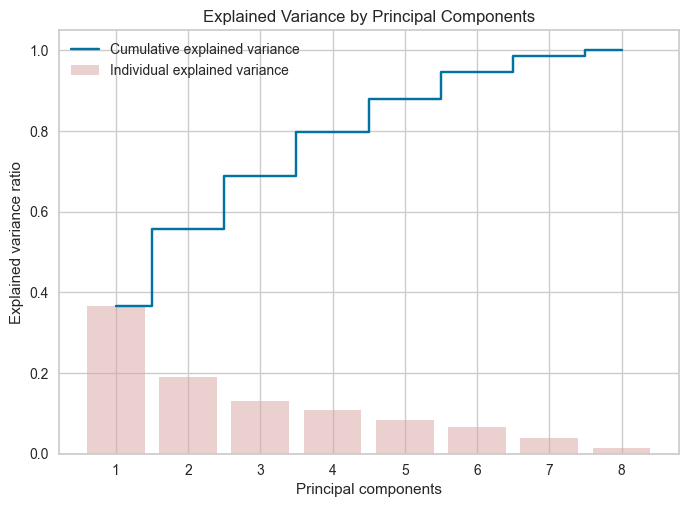

In [60]:
explained_variance_ratio = pca.explained_variance_ratio_ # Calculate the explained variance ratio

cumulative_variance_ratio = explained_variance_ratio.cumsum() # Compute the cumulative explained variance

plt.bar(range(1, len(explained_variance_ratio) + 1),
        explained_variance_ratio, alpha=0.5,
        color='#D7A3A1',
        align='center',
        label='Individual explained variance')

plt.step(range(1, len(cumulative_variance_ratio) + 1),
         cumulative_variance_ratio,
         where='mid',
         label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

The graph shows that the first few principal components explain a significant portion of the variance in the data. The rapid increase in cumulative explained variance at the beginning indicates that the first components contribute greatly to the data. However, as we move to the subsequent principal components, the explained variance decreases, suggesting that these additional components contribute less to the dataset.

The reason for choosing this is that the first few components explain most of the data's variance. The graph shows that the first four principal components explain over 80% of the total variance. This means that the first four components capture most of the information in the data, while the subsequent components contribute less information. Therefore, selecting the first four components provides enough information for the analysis while minimizing data loss. Additionally, reducing the dimensionality makes the analysis faster and more efficient.

## 3.2. K-means Clustering with PCA (15 Pts)
* Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

In [61]:
# Perform PCA with 4 components
pca = PCA(n_components=4)  

# Apply PCA to the normalized data and transform it to the new feature space
pca_data = pca.fit_transform(normalized_data)

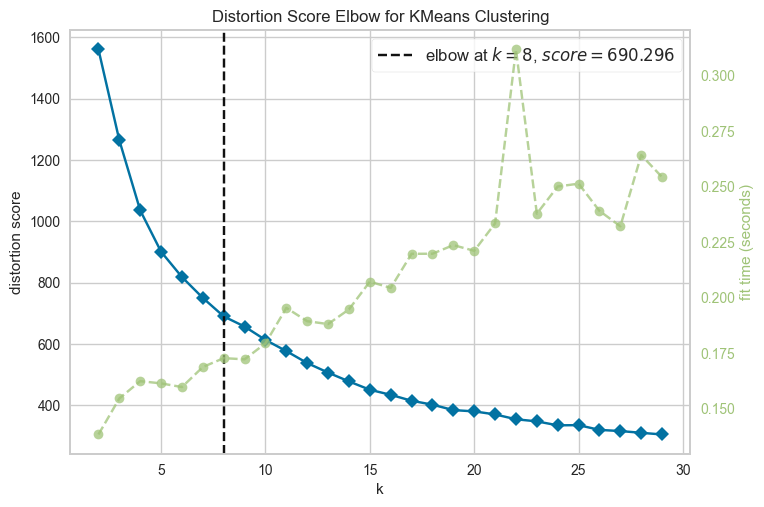

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# Create a KMeans model
kmeans = KMeans(random_state=42, n_init=10)

# Apply the Elbow method to find the optimal k
elbow = KElbowVisualizer(kmeans,random_state=42, k =(2,30))

# Fit the elbow visualizer
elbow.fit(pca_data)

# Show the Elbow plot
elbow.show()

In [63]:
# Convert pca_data to a DataFrame
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

In [64]:
pca_df

,PC1,PC2,PC3,PC4
0,1.503744,0.120549,-1.041340,-0.157929
1,1.908099,0.455134,-0.042783,0.362606
2,1.395768,-0.098368,0.496905,-0.253002
3,-1.435217,1.820151,1.651586,0.091883
4,-0.026447,1.406650,0.320055,-1.354152
...,...,...,...,...
435,1.666845,2.685271,-1.465055,-0.923111
436,-1.467180,1.353923,0.728992,1.215175
437,1.689448,1.006554,-1.276190,0.244700
438,-0.922297,0.434270,-0.996614,1.135592


In [65]:
# Apply KMeans clustering with 8 clusters
kmeans_with_pca = KMeans(n_clusters=8, random_state = 42, n_init=10).fit(pca_df)

# Assign the predicted cluster labels to a new column in the pca_df DataFrame
pca_df['Cluster'] = kmeans.labels_
pca_df

,PC1,PC2,PC3,PC4,Cluster
0,1.503744,0.120549,-1.041340,-0.157929,15
1,1.908099,0.455134,-0.042783,0.362606,1
2,1.395768,-0.098368,0.496905,-0.253002,3
3,-1.435217,1.820151,1.651586,0.091883,6
4,-0.026447,1.406650,0.320055,-1.354152,27
...,...,...,...,...,...
435,1.666845,2.685271,-1.465055,-0.923111,19
436,-1.467180,1.353923,0.728992,1.215175,11
437,1.689448,1.006554,-1.276190,0.244700,15
438,-0.922297,0.434270,-0.996614,1.135592,14


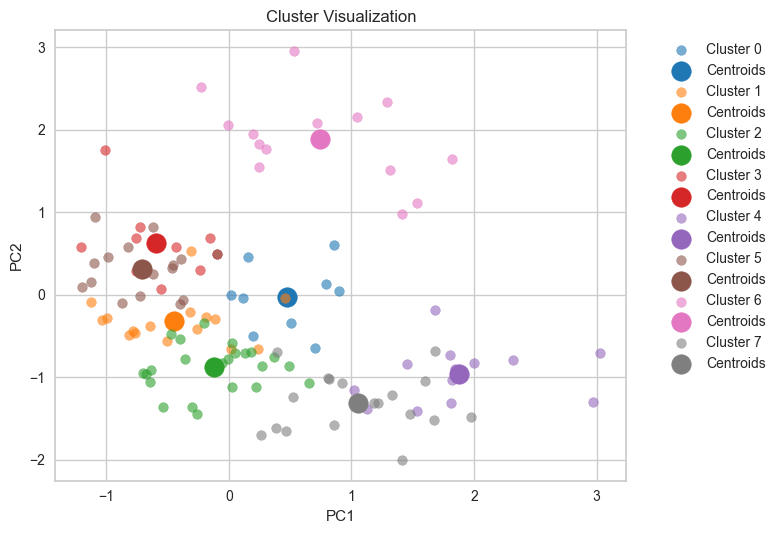

In [67]:
colors = plt.cm.tab10(range(8))

# Iterate through each of the 8 clusters
for cluster in range(8):  
    # Filter the data for the current cluster
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    
    # Plot the data points for the current cluster
    plt.scatter(cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], color=colors[cluster], label=f'Cluster {cluster}', alpha = 0.6)

    # Get the centroids of the clusters from KMeans
    centroids = kmeans.cluster_centers_
    
    # Plot the centroid for the current cluster
    plt.scatter(centroids[cluster, 1], centroids[cluster, 2], color=colors[cluster], s=200, label='Centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **PART- 4: Evaluate the Clustering Results (20 points)**

* Evaluate and compare the clustering results (k means with and without PCA) using the Silhouette Coefficients.

* Identify which clustering method and dataset version (original vs. PCA-reduced) resulted in the best clustering.

* Discuss the impact of dimensionality reduction (PCA) on clustering performance.

* Highlight any differences in performance between K-Means and Agglomerative Clustering.

In [41]:
silhouette_kmeans_no_pca = silhouette_score(normalized_data, kmeans_without_pca.labels_)
print(f'Silhouette Score for K-Means without PCA: {silhouette_kmeans_no_pca}')

Silhouette Score for K-Means without PCA: 0.1936895568728751


This score indicates that there is not a clear separation between the clusters and the clustering performance is low. However, there is still some distinction between certain clusters.

In [42]:
silhouette_kmeans_pca = silhouette_score(pca_data, kmeans_with_pca.labels_)
print(f'Silhouette Score for K-Means with PCA: {silhouette_kmeans_pca}')

Silhouette Score for K-Means with PCA: 0.2694381549969295


Clustering with PCA yields better results compared to the original data. This suggests that PCA reduces the noise in the dataset and enhances the separation between the clusters.

In [44]:
agg_cluster = AgglomerativeClustering(n_clusters=8).fit(normalized_data)
silhouette_agg = silhouette_score(normalized_data, agg_cluster.labels_)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agg}')

Silhouette Score for Agglomerative Clustering: 0.16914836305795508


The score obtained for Agglomerative Clustering is lower compared to K-means. This indicates weaker clustering performance and that the clusters are not distinctly separated.

When evaluating the Silhouette Scores, it can be concluded that the best result was achieved with K-means after applying PCA. This result shows that applying PCA made the clusters more distinct and improved clustering. It can be said that PCA, through dimensionality reduction, reduces noise and irrelevant features in the dataset, allowing for better separation of clusters. This demonstrates that PCA is effective in enhancing clustering performance.

K-means, being a centroid-based algorithm, forms clusters around central points, which is effective for well-separated and spherical-shaped clusters. On the other hand, Agglomerative Clustering is a hierarchical approach that creates clusters by merging the closest points or clusters, which can lead to more complex structures. However, despite its flexibility, Agglomerative Clustering performed worse in this case. This may be due to its sensitivity to noise and the higher computational resources it requires for large datasets. As a result, K-means emerges as a more efficient option for this dataset, while Agglomerative Clustering, despite being a more flexible method, exhibited lower performance in this particular case.